In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#import missingno as msno
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px

df=pd.read_csv("mental_health.csv")

In [2]:
#msno.matrix(df)

<AxesSubplot:>

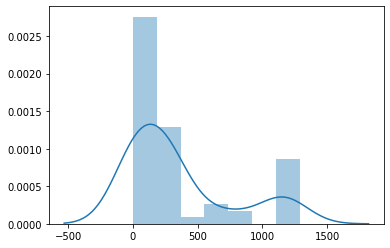

In [3]:
sns.distplot(df.isnull().sum()) 

In [4]:
#Renaming
renamed_columns=["Self_employed","Total_employees","Tech_organization","IT_Tech","Mental_health_coverage","Awareness_of_options_under_coverage","Employers_discussion_on_mental_health","Resources_and_options_for_help","Anomity_of_employees_using_mental_health_resources","Mental_issue_related_leave","Discussing_mental_health_neg_consequences","Discussing_physical_health_neg_consequences","Comfort_discussing_with_coworkers","Comfort_discussing_with_supervisor","Employer_seriousness_on_mental_health","Negative_consequences_of_coworkers_with_mental_health_disorder","Medical_coverage","Aware_of_local_online_resources","Reveal_condition_to_clients_business_contacts","Consequence_if_revealed_health_issue_to_client_or_business_contact",'Diagnosed_but_not_revealed_with_coworkers_employees','negimpact_reveal_coworker','prod_affect_mental_issue','percent_worktime_affected','have_prev_empl','prev_empl_mental_benefits','aware_benefits_prev_empl','formal_discuss_mental_health_premp','premp_provide_resources_learn_seekhelp','anonymity_protect_premp_choose_resources','neg_eff_discuss_mental_health_premp','neg_eff_discuss_phy_health_premp','willing_discuss_issue_prev_coworkers','willing_discuss_issue_dir_supervisors','premp_took_menhealth_seriously_as_phyhealth','neg_comments_abt_coworkers_with_menissues_prev_workplace','bring_phyhealth_issue_with_potential_empl_interview','phy_y_ynot','bring_menhealth_issue_with_potential_empl_interview','men_y_ynot','hurt_carrer_if_identified_as_person_with_mental_issue','more_neg_view_from_coworker_if_know_abt_men_issue','share_w_friends_fam','workplace_response','other_exp_in_workplace','fam_hist','past_mh','curr_mh','diagnosed','maybe_diagnosed','diagnosed_prof','diagnosed_prof_mh','treatment_mh_prof','work_interference_treatment','work_interference_no_treatment','age','gender','country_live','us_state_live','country_work','us_state_work','work_pos','remote']
df.columns=renamed_columns

In [5]:
to_drop_columns=[i for i in df.columns if df[i].isna().sum()>df.shape[0]/2]
print(to_drop_columns)
df.drop(to_drop_columns,axis=1,inplace=True)

['IT_Tech', 'Medical_coverage', 'Aware_of_local_online_resources', 'Reveal_condition_to_clients_business_contacts', 'Consequence_if_revealed_health_issue_to_client_or_business_contact', 'Diagnosed_but_not_revealed_with_coworkers_employees', 'negimpact_reveal_coworker', 'prod_affect_mental_issue', 'percent_worktime_affected', 'other_exp_in_workplace', 'diagnosed', 'maybe_diagnosed', 'diagnosed_prof_mh']


In [6]:
print(df.shape)

(1433, 50)


In [7]:
#gender has 70 different classes. Encoding them to fewer classes for ease of calculation:
#male:1, female:2, anything else:3
df['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

df['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

df['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman','NaN'], value = 3, inplace = True)
#Change all non-responses to 3
df['gender'].replace(to_replace=[np.NaN], value=3,inplace=True)

In [8]:
#columns 'phy_y_ynot' and 'men_y_ynot' mainly contain comments which aren't of much use for our problem definition
# hence, we drop the columns 'phy_y_ynot' and 'men_y_ynot'
df.drop(labels ='phy_y_ynot', axis = 1, inplace = True)
df.drop(labels ='men_y_ynot', axis = 1, inplace = True)

# dealing with missing values in 'prev_empl_mental_benefits'
# from previous operation, we see that, whenever the value for have_prev_empl = 0, then the value for 'prev_empl_mental_benefits' = Nan
# hence replacing the nans with "Not Applicable"
df['prev_empl_mental_benefits'].fillna('Not Applicable',inplace= True)
df['prev_empl_mental_benefits'].unique()

# the same observation was found for the missing values in columns from formal_discuss_mental_health_premp' to'neg_comments_abt_coworkers_with_menissues_prev_workplace'
# replacing missing values 
# whenever the value for have_prev_empl = 0, then the value in the other col= Nan
# hence replacing the nans with "Not Applicable"
df['aware_benefits_prev_empl'].fillna('Not Applicable',inplace= True)
df['formal_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['premp_provide_resources_learn_seekhelp'].fillna('Not Applicable',inplace= True)
df['anonymity_protect_premp_choose_resources'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_phy_health_premp'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_dir_supervisors'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_prev_coworkers'].fillna('Not Applicable',inplace= True) 
df['premp_took_menhealth_seriously_as_phyhealth'].fillna('Not Applicable',inplace= True)
df['neg_comments_abt_coworkers_with_menissues_prev_workplace'].fillna('Not Applicable',inplace= True)

#Acronyms of countries with long names (United states of america)
df['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

#Removing age outliers (323,3,etc). Replace such ages with the mean of all ages
mean_age = df[(df['age'] >= 18) | (df['age'] <= 80)]['age'].mean()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)
df['age'].replace(to_replace = 34.28611304954641 , value = 34, inplace = True)


In [9]:
df.isnull().sum().sum()

5415

In [10]:
#to_drop_columns=[i for i in df.columns if df[i].isna().sum()>1]
#print(to_drop_columns)
i=0
j=0
#df['country_live'].isnull().values.any()
#df.isnull().values.any()
for i in df.columns:
    if(df[i].isnull().values.any()):
        print(i)


Total_employees
Tech_organization
Mental_health_coverage
Awareness_of_options_under_coverage
Employers_discussion_on_mental_health
Resources_and_options_for_help
Anomity_of_employees_using_mental_health_resources
Mental_issue_related_leave
Discussing_mental_health_neg_consequences
Discussing_physical_health_neg_consequences
Comfort_discussing_with_coworkers
Comfort_discussing_with_supervisor
Employer_seriousness_on_mental_health
Negative_consequences_of_coworkers_with_mental_health_disorder
workplace_response
us_state_live
us_state_work


In [11]:
df.isnull().sum().sum()

5415

In [12]:
#Imputing nans
print(df.isnull().sum().sum())
#print(df['Total_employees'].isnull().values.any())
df['Total_employees']=df['Total_employees'].replace(to_replace=np.nan,value='1-5')
df['Tech_organization']=df['Tech_organization'].replace(to_replace=np.nan,value=1)

for column in df.columns:
    if column!='Self_employed':
        #df.loc[df.column.isnull(), column] = df.'Self_employed'.map(fast_mode(df, ['CIK'], 'SIK').set_index('CIK').SIK)
        #print(column,df[column].isnull().values.any())
        df[column]= df.groupby(['Self_employed'], sort=False)[column].apply(lambda x: x.fillna(x.mode()))
        #print(column,df[column].isnull().values.any())
    

5415


In [13]:
df=df.dropna()

In [14]:
df.isnull().sum().sum()

0

In [15]:
#Encoding
No_of_pos=[]
for i in df['work_pos']:
    No_of_pos.append(i.count('|')+1)
df['No_of_pos']=No_of_pos
df.drop(labels ='work_pos', axis = 1, inplace = True)


In [16]:
encode={
    'Total_employees' : [['26-100', '6-25', '0','More than 1000' ,'100-500', '500-1000', '1-5'],[3,2,0,6,4,5,1]],
    'Mental_health_coverage' : [['Not eligible for coverage / N/A' ,'No', 'Yes', "I don't know"],[0,2,3,1]],
    'Awareness_of_options_under_coverage' : [['Yes', 'No', 'I am not sure'],[2,1,0]],
    'Employers_discussion_on_mental_health' : [['Yes' ,'No',"I don't know"],[2,1,0]],
    'Resources_and_options_for_help' : [['Yes', 'No', "I don't know"],[2,1,0]],
    'Anomity_of_employees_using_mental_health_resources' : [['Yes', 'No', "I don't know"],[2,1,0]],
    'Mental_issue_related_leave' : [['Somewhat easy' ,'Neither easy nor difficult', 'Very easy', 'Very difficult', 'Somewhat difficult', "I don't know"],[4,2,5,0,1,3]],
    'Discussing_mental_health_neg_consequences' : [['No', 'Yes', 'Maybe'],[2,0,1]],
    'Discussing_physical_health_neg_consequences' : [['No', 'Maybe','Yes'],[2,1,0]],
    'Comfort_discussing_with_coworkers' : [['Maybe', 'Yes', 'No'],[1,2,0]],
    'Comfort_discussing_with_supervisor' : [['Yes', 'No', 'Maybe'],[2,0,1]],
    'Employer_seriousness_on_mental_health' : [['Yes', 'No', "I don't know"],[2,0,1]],
    'Negative_consequences_of_coworkers_with_mental_health_disorder' : [['No','Yes'],[1,0]],
    'prev_empl_mental_benefits' : [['Yes, they all did', "I don't know", 'Some did', 'No, none did', 'Not Applicable'],[4,2,3,0,1]],
    'aware_benefits_prev_empl' : [['I was aware of some', 'N/A (not currently aware)', 'Yes, I was aware of all of them', 'No, I only became aware later', 'Not Applicable'],[3,2,4,0,1]],
    'formal_discuss_mental_health_premp' : [['None did', 'Some did', 'Not Applicable', "I don't know", 'Yes, they all did'],[0,3,1,2,4]],
    'premp_provide_resources_learn_seekhelp' : [['Some did', 'None did', 'Not Applicable', 'Yes, they all did'],[2,0,1,3]],
    'anonymity_protect_premp_choose_resources' : [['Yes, always', "I don't know", 'Sometimes', 'No', 'Not Applicable'],[4,2,3,0,1]],
    'neg_eff_discuss_mental_health_premp' : [['None of them', 'Some of them','Yes, all of them', "I don't know", 'Not Applicable'],[4,1,0,2,3]],
    'neg_eff_discuss_phy_health_premp' : [['None of them', 'Some of them', 'Yes, all of them', 'Not Applicable'],[3,1,0,2]],
    'willing_discuss_issue_prev_coworkers'  : [['No, at none of my previous employers', 'Some of my previous employers', 'Yes, at all of my previous employers', 'Not Applicable'],[0,1,3,2]],
    'willing_discuss_issue_dir_supervisors' : [['Some of my previous employers','Yes, at all of my previous employers', 'No, at none of my previous employers', "I don't know", 'Not Applicable'],[3,4,0,1,2]],
    'premp_took_menhealth_seriously_as_phyhealth' :[["I don't know",'Some did','None did','Yes, they all did','Not Applicable'],[0,2,1,3,0]],
    'neg_comments_abt_coworkers_with_menissues_prev_workplace':[['None of them','Some of them','Not Applicable','Yes, all of them'],[1,2,0,3]],
    'bring_phyhealth_issue_with_potential_empl_interview'   :   [['Maybe','Yes','No'],[1,2,0]],
    'bring_menhealth_issue_with_potential_empl_interview'   :   [['Maybe', 'No', 'Yes'],[1,0,2]],
    'hurt_carrer_if_identified_as_person_with_mental_issue'   :   [['Maybe', "No, I don't think it would", 'Yes, I think it would',
    'No, it has not', 'Yes, it has'],[1,0,2,0,2]],
    'more_neg_view_from_coworker_if_know_abt_men_issue'   :   [["No, I don't think they would", 'Maybe', 'Yes, they do',
    'Yes, I think they would', 'No, they do not'],[0,1,2,2,0]],
    'share_w_friends_fam'   :   [['Somewhat open', 'Neutral', 'Not applicable to me (I do not have a mental illness)', 'Very open',
    'Not open at all', 'Somewhat not open'],[4,3,0,5,1,2]],
    'workplace_response'   :   [['No', 'Maybe/Not sure', 'Yes, I experienced', 'Yes, I observed', np.nan],[0,1,2,2,1]],
    'fam_hist'   :   [['No', 'Yes', "I don't know"],[0,2,1]],
    'past_mh'   :   [['Yes', 'Maybe', 'No'],[2,1,0]],
    'curr_mh'   :   [['No', 'Yes', 'Maybe'],[0,2,1]],
    'diagnosed_prof'   :   [['Yes', 'No'],[1,0]],
    'work_interference_treatment'   :   [['Not applicable to me', 'Rarely', 'Sometimes', 'Never', 'Often'],[0,2,3,1,4]],
    'work_interference_no_treatment'   :   [['Not applicable to me', 'Sometimes', 'Often', 'Rarely', 'Never'],[0,3,4,2,1]],
    'remote'   :   [['Sometimes','Never','Always'],[1,0,2]]
}


In [17]:
indexNames = df[~(df['Self_employed'] == 0)].index
fill=['0',0,'Not eligible for coverage / N/A','No','No','No',"I don't know","Somewhat easy","No","No","Maybe","Yes","I don't know","No"]
for i in indexNames:
    df.iloc[i,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]]=fill

In [18]:
for i in encode.keys():
    df[i]=df[i].replace(to_replace=encode[i][0],value=encode[i][1])

In [19]:
north_east=['Pennsylvania','New York','Rhode Island','Maine','New Jersey','New Hampshire','Massachusetts','Vermont','Connecticut']
south=['Delaware','District of Columbia','Texas','Louisiana','Oklahoma','Alabama','Kentucky','Virginia','South Carolina','Maryland','West Virginia','North Carolina','Georgia','Florida','Tennessee']
mid_west=['Illinois','Indiana','Minnesota','Iowa','Ohio','Michigan','Wisconsin','Missouri','Nebraska','North Dakota','South Dakota','Kansas']
west=['California','Montana','Oregon','New Mexico','Alaska','Washington','Nevada','Arizona','Utah','Colorado','Hawaii','Idaho']

In [20]:
#Encoding columns - us_state_live and us_state_work
# north_east=1, mid_west=2, west=3, south=4
df['us_state_live'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_live'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_live'].replace(to_replace = west,value =3, inplace = True)
df['us_state_live'].replace(to_replace = south, value =4, inplace = True)

In [21]:

df['us_state_work'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_work'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_work'].replace(to_replace = west,value =3, inplace = True)
df['us_state_work'].replace(to_replace = south, value =4, inplace = True)

In [22]:
#Encoding country_live and country_work
# USA=0 UK=1
df['country_live'].replace(to_replace = 'USA', value =0, inplace = True)
df['country_live'].replace(to_replace = 'UK', value =1, inplace = True)
df['country_work'].replace(to_replace = 'USA',value =0, inplace = True)
df['country_work'].replace(to_replace = 'UK', value =1, inplace = True)

In [23]:
for i in df.columns:
    print(i," : ",df[i].unique())
print(len(df.columns))

Self_employed  :  [0]
Total_employees  :  [3 2 6 4 5 1]
Tech_organization  :  [1. 0.]
Mental_health_coverage  :  [0 2 3 1]
Awareness_of_options_under_coverage  :  [1 2 0]
Employers_discussion_on_mental_health  :  [1 2 0]
Resources_and_options_for_help  :  [1 2 0]
Anomity_of_employees_using_mental_health_resources  :  [0 2 1]
Mental_issue_related_leave  :  [5 4 2 0 1 3]
Discussing_mental_health_neg_consequences  :  [2 0 1]
Discussing_physical_health_neg_consequences  :  [2 1 0]
Comfort_discussing_with_coworkers  :  [1 2 0]
Comfort_discussing_with_supervisor  :  [2 0 1]
Employer_seriousness_on_mental_health  :  [1 2 0]
Negative_consequences_of_coworkers_with_mental_health_disorder  :  [1 0]
have_prev_empl  :  [1 0]
prev_empl_mental_benefits  :  [0 4 2 3 1]
aware_benefits_prev_empl  :  [2 3 4 0 1]
formal_discuss_mental_health_premp  :  [2 0 3 1 4]
premp_provide_resources_learn_seekhelp  :  [0 2 1 3]
anonymity_protect_premp_choose_resources  :  [2 4 3 0 1]
neg_eff_discuss_mental_health_pre

In [24]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [25]:
df_train

,Self_employed,Total_employees,Tech_organization,Mental_health_coverage,Awareness_of_options_under_coverage,Employers_discussion_on_mental_health,Resources_and_options_for_help,Anomity_of_employees_using_mental_health_resources,Mental_issue_related_leave,Discussing_mental_health_neg_consequences,...,work_interference_treatment,work_interference_no_treatment,age,gender,country_live,us_state_live,country_work,us_state_work,remote,No_of_pos
422,0,4,1.0,3,2,2,2,2,4,2,...,2,3,30.0,1.0,0,3,0,3,1,2
404,0,3,1.0,1,1,2,1,0,5,0,...,1,4,31.0,1.0,0,4,0,3,2,3
585,0,3,1.0,3,2,1,1,0,2,2,...,3,3,34.0,1.0,0,4,0,4,1,1
179,0,4,1.0,3,0,0,0,0,5,2,...,3,4,27.0,1.0,0,4,0,3,2,3
1286,0,6,0.0,3,2,1,1,2,1,0,...,3,4,39.0,2.0,0,2,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,3,1.0,1,1,1,0,0,3,0,...,0,0,26.0,2.0,0,2,0,2,1,2
207,0,3,1.0,1,1,1,1,0,1,1,...,3,4,30.0,1.0,0,3,0,3,2,2
555,0,4,1.0,2,2,1,1,0,1,0,...,3,4,32.0,1.0,0,3,0,3,1,1
950,0,3,1.0,1,0,1,1,0,1,1,...,2,3,28.0,1.0,0,4,0,4,0,1


In [26]:
df_test

,Self_employed,Total_employees,Tech_organization,Mental_health_coverage,Awareness_of_options_under_coverage,Employers_discussion_on_mental_health,Resources_and_options_for_help,Anomity_of_employees_using_mental_health_resources,Mental_issue_related_leave,Discussing_mental_health_neg_consequences,...,work_interference_treatment,work_interference_no_treatment,age,gender,country_live,us_state_live,country_work,us_state_work,remote,No_of_pos
1373,0,4,1.0,3,1,1,0,0,3,0,...,0,0,35.0,1.0,0,3,0,3,1,1
556,0,4,1.0,1,1,1,0,0,2,2,...,0,2,29.0,1.0,0,3,0,3,1,1
593,0,3,1.0,1,0,1,1,0,4,2,...,1,1,32.0,1.0,0,2,0,2,2,2
132,0,5,1.0,2,0,1,1,0,1,0,...,1,3,30.0,1.0,0,3,0,3,1,1
624,0,4,1.0,3,0,1,1,2,1,1,...,3,3,31.0,3.0,0,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,0,6,1.0,3,2,1,1,0,5,2,...,3,4,30.0,1.0,0,1,0,1,0,2
629,0,2,1.0,3,0,1,1,0,1,1,...,0,3,26.0,2.0,0,2,0,2,2,2
162,0,4,1.0,3,2,1,2,0,4,1,...,2,4,41.0,2.0,0,3,0,3,1,1
632,0,4,0.0,3,2,2,1,2,1,1,...,0,0,24.0,1.0,0,2,0,2,1,1


In [27]:
#KNN
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
#y = df['curr_mh'] 
#X = df.drop('curr_mh', axis = 1) 
y = df['diagnosed_prof'] 
X = df.drop('diagnosed_prof', axis = 1) 
# Separating the dependent and independent variable 
  
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0) 

  


In [28]:
K = [] 
training = [] 
test = [] 
scores = {}
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
for k in range(2, 19): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 


In [29]:
for keys, values in scores.items(): 
    print(keys, ':', values)

2 : [0.9128540305010894, 0.8080808080808081]
3 : [0.9150326797385621, 0.8585858585858586]
4 : [0.9084967320261438, 0.8535353535353535]
5 : [0.9019607843137255, 0.8888888888888888]
6 : [0.9019607843137255, 0.8939393939393939]
7 : [0.8888888888888888, 0.8939393939393939]
8 : [0.8910675381263616, 0.8939393939393939]
9 : [0.8801742919389978, 0.898989898989899]
10 : [0.8801742919389978, 0.898989898989899]
11 : [0.8823529411764706, 0.9040404040404041]
12 : [0.8801742919389978, 0.8939393939393939]
13 : [0.8779956427015251, 0.898989898989899]
14 : [0.8758169934640523, 0.8888888888888888]
15 : [0.8779956427015251, 0.8888888888888888]
16 : [0.8801742919389978, 0.898989898989899]
17 : [0.8801742919389978, 0.898989898989899]
18 : [0.8823529411764706, 0.898989898989899]


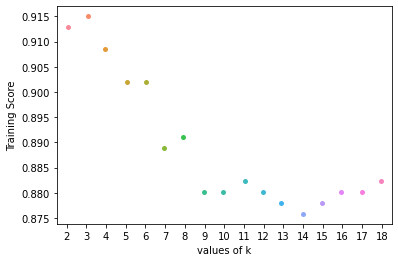

In [30]:
ax = sns.stripplot(K, training); 
ax.set(xlabel ='values of k', ylabel ='Training Score')   
  
plt.show()

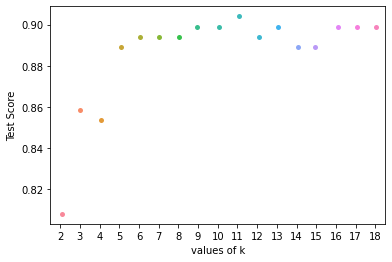

In [31]:
ax = sns.stripplot(K, test); 
ax.set(xlabel ='values of k', ylabel ='Test Score') 
plt.show()

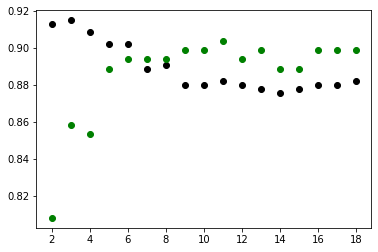

In [32]:
plt.scatter(K, training, color ='k') 
plt.scatter(K, test, color ='g') 
plt.show()

In [33]:
#optimum value of k=8
knn = KNeighborsClassifier(n_neighbors=17)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.898989898989899


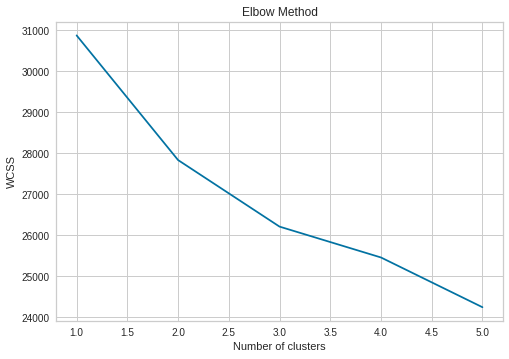

In [35]:
#KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
wcss = []
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
scaler=StandardScaler()
X=scaler.fit_transform(df)
#kmeans_model = KMeans(max_iter=600,n_clusters=3, random_state=42)
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=600, n_init=1, random_state=0)
    kmeans.fit(X)
    #kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

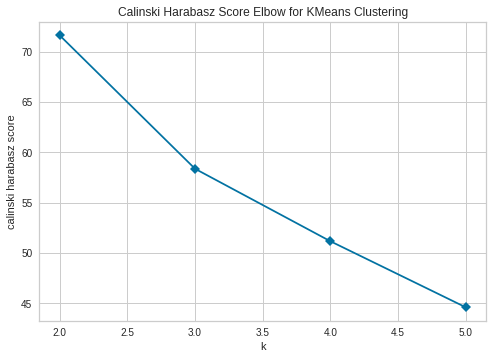

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [36]:
model = KMeans()
#X = scaler.fit_transform(X)
visualizer = KElbowVisualizer(model, k=(2,6), metric='calinski_harabasz', timings=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

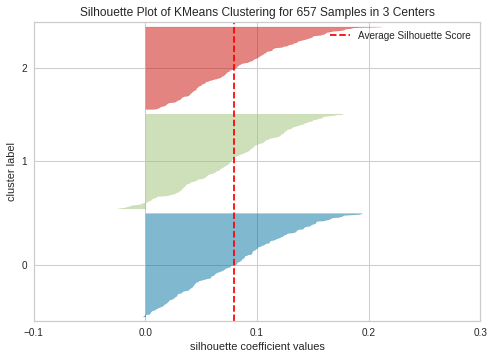

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 657 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [38]:
kmeans_model= KMeans(max_iter=600,n_clusters=3, random_state=0, n_jobs=-1).fit(X)
labels = kmeans_model.labels_

sse= kmeans_model.inertia_
score1 = silhouette_score(X, labels, metric='euclidean')
score3=metrics.calinski_harabasz_score(X, labels)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)

Sum of sqaured errors SSE:  26202.171475106254
Silhouette score: 0.07895209353738954
calinski_harabasz_score: 58.366


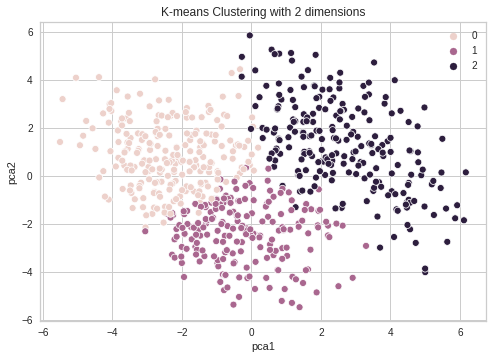

In [39]:
from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=labels, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [40]:
#Calculating risk scores for each cluster using the classifications for curr_mh and diagnosed_prof- 
#we make 3 different clusters
cluster1 = [x[0] for x, value in np.ndenumerate(labels) if value==0]
cluster2=[x[0] for x, value in np.ndenumerate(labels) if value==1]
cluster3=[x[0] for x, value in np.ndenumerate(labels) if value==2]
cluster1_risk=0
total_high=0
for i in range(len(cluster1)) :
    diagnosed=df.iloc[cluster1[i], 36]
    curr_mh=df.iloc[cluster1[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster1_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster1_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster1_risk+=0.25
    
cluster2_risk=0
for i in range(len(cluster2)) : 
    diagnosed=df.iloc[cluster2[i], 36]
    curr_mh=df.iloc[cluster2[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster2_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster2_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster2_risk+=0.25
cluster3_risk=0
for i in range(len(cluster3)) : 
    diagnosed=df.iloc[cluster3[i], 36]
    curr_mh=df.iloc[cluster3[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster3_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster3_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster3_risk+=0.25
#THe risks for each cluster are used to identify which cluster is high, low, med
#print('cluster1:',cluster1_risk)
#print('cluster2:',cluster2_risk)
#print('cluster3:',cluster3_risk)
#print(cluster1)
#print(cluster2)
#print(cluster3)

In [41]:
#Classifying clusters as high, row and medium risks using cluster risks
cluster_risks=[[cluster1,cluster1_risk],[cluster2,cluster2_risk],[cluster3,cluster3_risk]]
high_risk=0
total=3
low_risk=100
for i in range(0,len(cluster_risks)):
    if(high_risk<=cluster_risks[i][1]):
        high_risk_class=cluster_risks[i][0]
        high_risk_index=i
        high_risk=cluster_risks[i][1]
total-=high_risk_index
#print(total)
for i in range(0,len(cluster_risks)):
    if(low_risk>=cluster_risks[i][1]):
        low_risk_class=cluster_risks[i][0]
        low_risk_index=i
        low_risk=cluster_risks[i][1]
total-=low_risk_index
med_risk_class=cluster_risks[total][0]
#print(high_risk_class)
#print(med_risk_class)
#print(low_risk_class)


In [42]:
#Inferences
#Effect of family history col no=33
fam_hist_high=0;
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],33]==2):
            fam_hist_high+=2
        if(df.iloc[high_risk_class[i],33]==1):
            fam_hist_high+=1

fam_hist_med=0;
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],33]==2):
            fam_hist_med+=2
        if(df.iloc[med_risk_class[i],33]==1):
            fam_hist_med+=1
            
fam_hist_low=0;
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],33]==2):
            fam_hist_low+=2
        if(df.iloc[low_risk_class[i],33]==1):
            fam_hist_low+=1
#print(fam_hist_high)
#print(fam_hist_med)
#print(fam_hist_low)

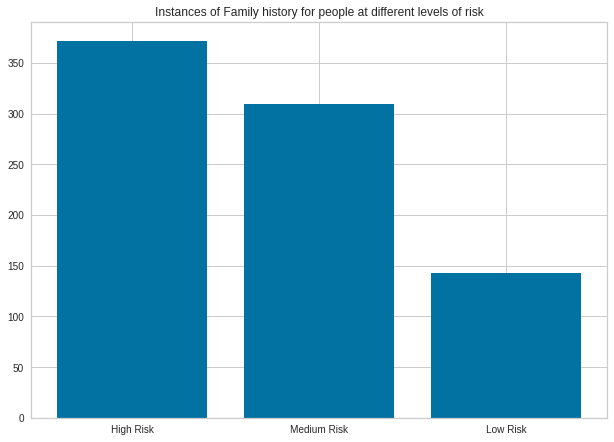

In [43]:
#plotting Effect of family history col no=33
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[fam_hist_high, fam_hist_med, fam_hist_low]
ax.bar(risks,level)
plt.title('Instances of Family history for people at different levels of risk')
plt.show()

In [44]:
#Plotting how likely people at a certain level of risk are to be diagnosed == col 36
#For high risk
diagnosed_high=0;
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],36]==1):
            diagnosed_high+=2
#For medium risk
diagnosed_med=0;
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],36]==1):
            diagnosed_med+=2
#For low risk
diagnosed_low=0;
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],36]==1):
            diagnosed_med+=2
            

#print(diagnosed_high)
#print(diagnosed_med)
#print(diagnosed_low)

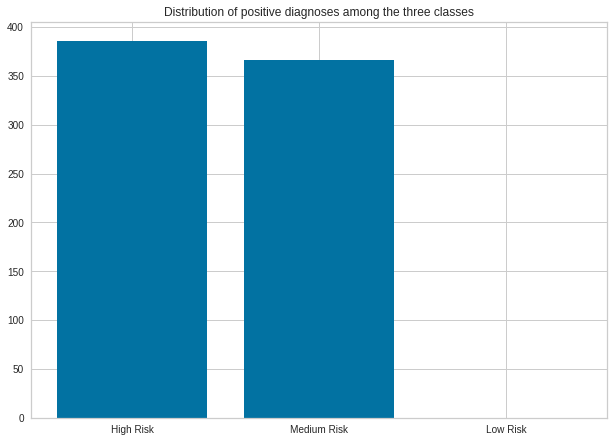

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[diagnosed_high,diagnosed_med, diagnosed_low]
ax.bar(risks,level)
plt.title('Distribution of positive diagnoses among the three classes')
plt.show()

In [46]:
#Risk levels for people who dont open up about their illness: col=31
share_high=0;
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],31]==1): 
            share_high+=3
        if(df.iloc[high_risk_class[i],31]==2):
            share_high+=1
        
#For medium risk
share_med=0;
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],31]==1):#somewhat open
            share_med+=3
        if(df.iloc[med_risk_class[i],31]==2):
            share_med+=1
#For low risk
share_low=0;
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],31]==1):
            share_low+=3
        if(df.iloc[low_risk_class[i],31]==2):
            share_med+=1
            

#print(share_high)
#print(share_med)
#print(share_low)

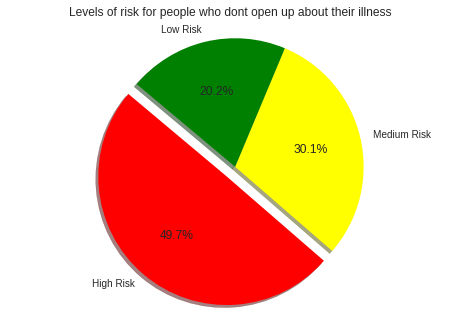

In [47]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [share_high, share_med, share_low]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Levels of risk for people who dont open up about their illness')
plt.show()

In [48]:
#If working remote affects their mental health col==46
remote_high=0;
not_remote_high=0
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],46]==2): 
            remote_high+=2
        if(df.iloc[high_risk_class[i],46]==0): 
            not_remote_high+=2
        #if(df.iloc[high_risk_class[i],46]==1):
         #   remote_high+=0.5
        
#For medium risk
remote_med=0;
not_remote_med=0;
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],46]==2):
            remote_med+=2
        if(df.iloc[med_risk_class[i],46]==0): 
            not_remote_med+=2
        #if(df.iloc[med_risk_class[i],46]==1):
         #   remote_med+=0.5
#For low risk
remote_low=0;
not_remote_low=0;
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],46]==2):
            remote_low+=2
        if(df.iloc[low_risk_class[i],46]==0): 
            not_remote_low+=2
        #if(df.iloc[low_risk_class[i],46]==1):
         #   remote_low+=0.5
            
#print("REMOTE")
#print(remote_high)
#print(remote_med)
#print(remote_low)
#print("NOT REMOTE")
#print(not_remote_high)
#print(not_remote_med)
#print(not_remote_low)

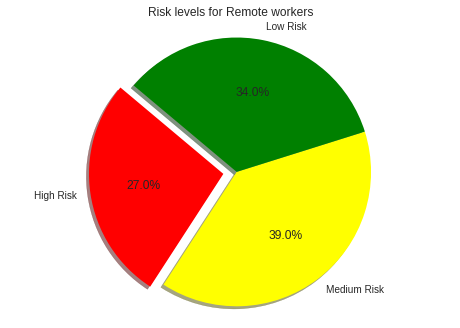

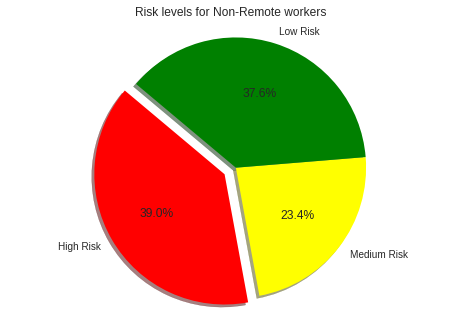

In [49]:
#Risk levels for remote and non-remote workers
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [remote_high, remote_med, remote_low]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Risk levels for Remote workers')
plt.show()

sizes = [not_remote_high, not_remote_med, not_remote_low]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Risk levels for Non-Remote workers')
plt.show()

In [50]:
#Seeing as non-remote workers run such a high risk, we decided to examine the attitudes of their work culture
#taking into consideration:  1) how coworkers with illness were received 2) how the ppl felt about coworkers viewing
# their struggles with mental illness 4) response from work place
#col_nos= 12, 30, 32
response_risk_high=0
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],12]==0): 
            response_risk_high+=1
        if(df.iloc[high_risk_class[i],30]==2):
            response_risk_high+=1
        if(df.iloc[high_risk_class[i],32]==2):
            response_risk_high+=1
        
#For medium risk
response_risk_med=0
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],12]==0): 
            response_risk_med+=1
        if(df.iloc[med_risk_class[i],30]==2):
            response_risk_med+=1
        if(df.iloc[med_risk_class[i],32]==2):
            response_risk_med+=1
#For low risk
response_risk_low=0
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],12]==0): 
            response_risk_low+=1
        if(df.iloc[low_risk_class[i],30]==2):
            response_risk_low+=1
        if(df.iloc[low_risk_class[i],32]==2):
            response_risk_low+=1
            

#print(response_risk_high)
#print(response_risk_med)
#print(response_risk_low)

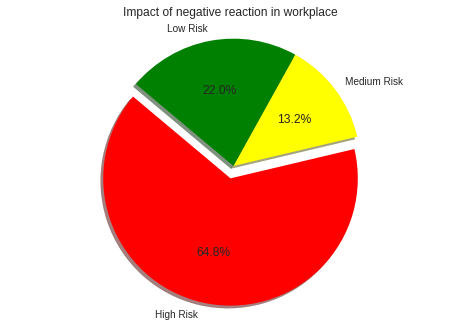

In [51]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [response_risk_high, response_risk_med, response_risk_low]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Impact of negative reaction in workplace')
plt.show()